<a href="https://colab.research.google.com/github/Camves/Analise_Impactos_PCA_BOOTSTRAP/blob/main/PCA_BOOTSTRAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd

# PCA - DATASET VINHO

##Carregando banco de dados de qualidade do vinho

In [ ]:
import pandas as pd
# load dataset into Pandas DataFrame
df = pd.read_csv("/content/vinho_dataset.csv",sep=";")

df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Padronizar os dados

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ["fixed acidity",	"volatile acidity",	"citric acid",	"residual sugar",	"chlorides", "free sulfur dioxide",	"total sulfur dioxide",	"density",	"pH",	"sulphates",	"alcohol"]
# Separando as features do dataframe
x = df.loc[:, features].values
# Separando as saídas do dataframe
y = df.loc[:,['quality']].values
# Normalizando as features -> z = (x-mean)/sd
x = StandardScaler().fit_transform(x)

df3 = pd.DataFrame(x,columns=["fixed acidity",	"volatile acidity",	"citric acid",	"residual sugar",	"chlorides", "free sulfur dioxide",	"total sulfur dioxide",	"density",	"pH",	"sulphates",	"alcohol"])
df3.insert(11,'quality',y)
df3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5


## Usando PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])
finalDf = pd.concat([principalDf, df3[['quality']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,quality
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,5
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,5
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,5
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,6
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,5


In [ ]:
import numpy as np
#Variância dos dados explicada por cada componente:
var_exp = pca.explained_variance_ratio_
print(var_exp)
for i in range(np.shape(var_exp)[0]):
  print(i+1,'ª componente: ', var_exp[i])
print('Variação total explicada pelas componentes principais:',np.sum(var_exp))

[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439]
1 ª componente:  0.28173931278817294
2 ª componente:  0.17508269905476798
3 ª componente:  0.14095849897952162
4 ª componente:  0.11029386641621147
5 ª componente:  0.08720837012236184
6 ª componente:  0.05996438771540096
Variação total explicada pelas componentes principais: 0.8552471350764367


In [ ]:
pca2 = PCA(n_components=4)
principalComponents2 = pca2.fit_transform(x)
principalDf2 = pd.DataFrame(data = principalComponents2
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
finalDf2 = pd.concat([principalDf2, df3[['quality']]], axis = 1)
finalDf2.head()

,principal component 1,principal component 2,principal component 3,principal component 4,quality
0,-1.619530,0.450950,-1.774454,0.043740,5
1,-0.799170,1.856553,-0.911690,0.548066,5
2,-0.748479,0.882039,-1.171394,0.411021,5
3,2.357673,-0.269976,0.243489,-0.928450,6
4,-1.619530,0.450950,-1.774454,0.043740,5


In [ ]:
#Variância dos dados explicada por cada componente:
var_exp2 = pca2.explained_variance_ratio_
print(var_exp2)
for i in range(np.shape(var_exp2)[0]):
  print(i+1,'ª componente: ', var_exp2[i])
print('Variação total explicada pelas componentes principais:',np.sum(var_exp2))

df3.quality.unique()

[0.28173931 0.1750827  0.1409585  0.11029387]
1 ª componente:  0.28173931278817294
2 ª componente:  0.17508269905476798
3 ª componente:  0.14095849897952176
4 ª componente:  0.11029386641621146
Variação total explicada pelas componentes principais: 0.7080743772386741


array([5, 6, 7, 4, 8, 3])

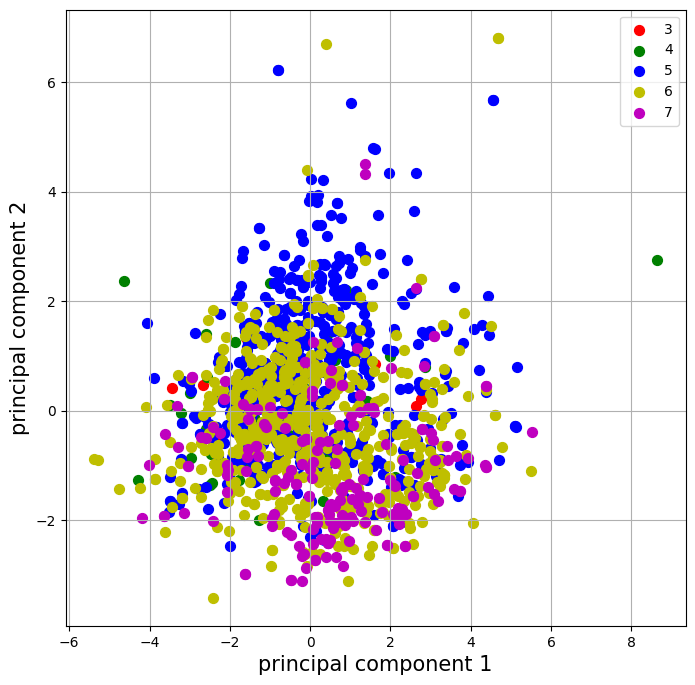

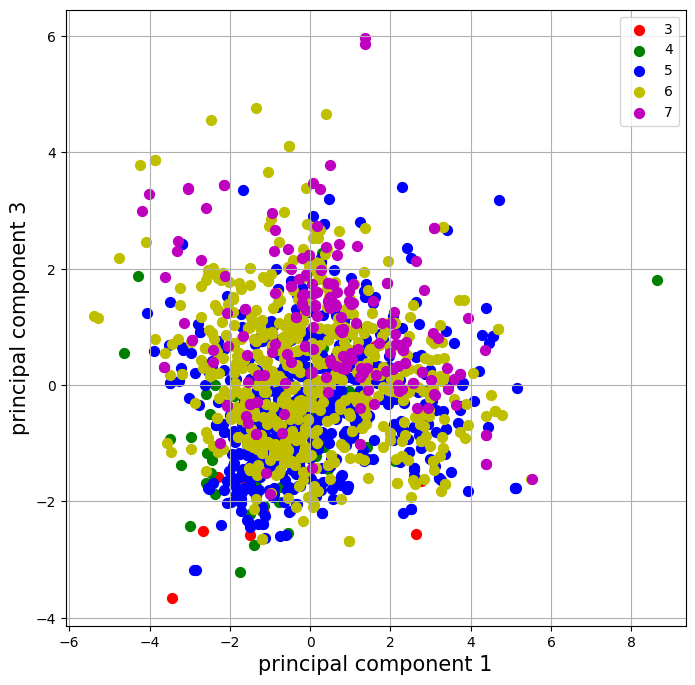

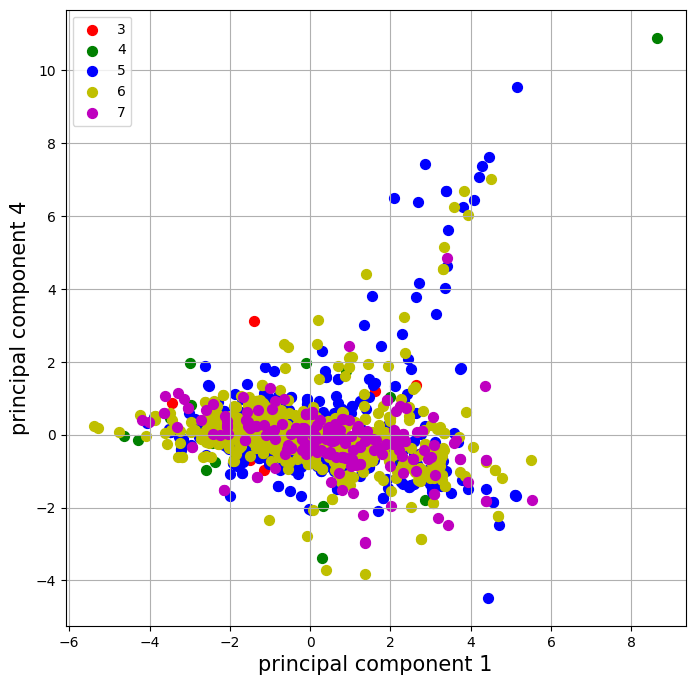

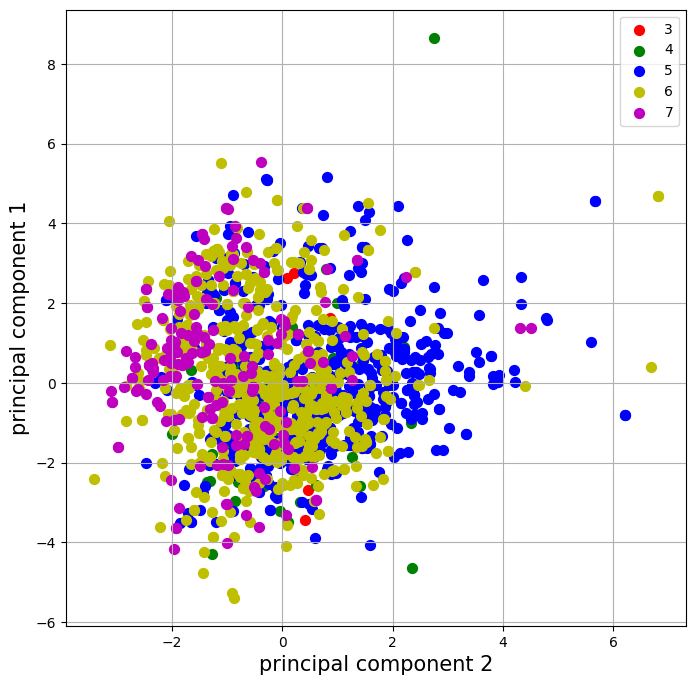

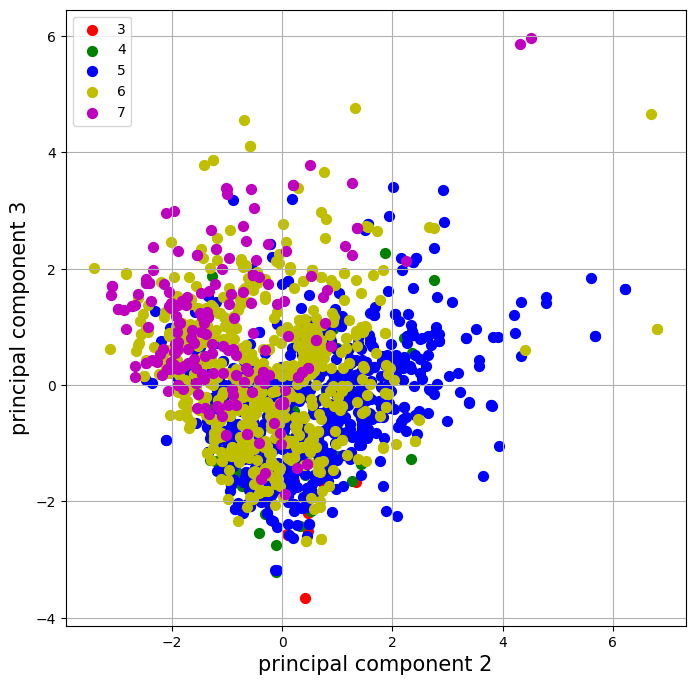

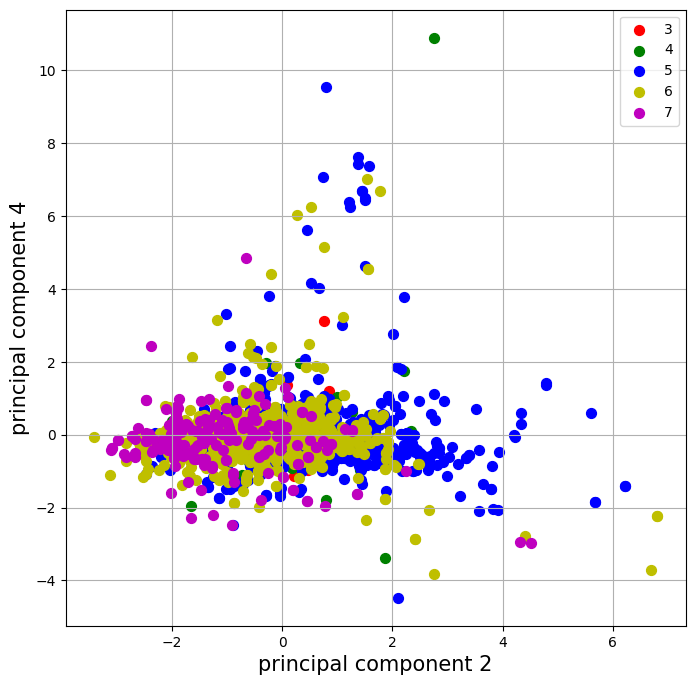

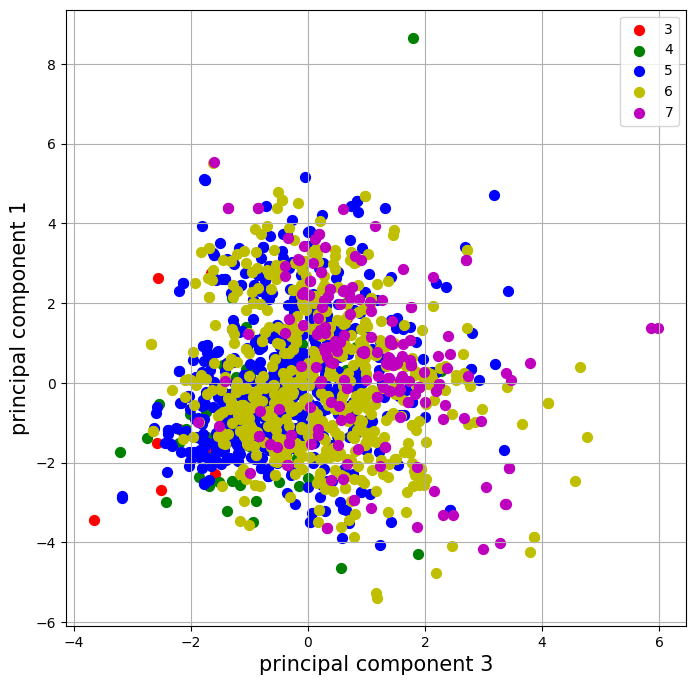

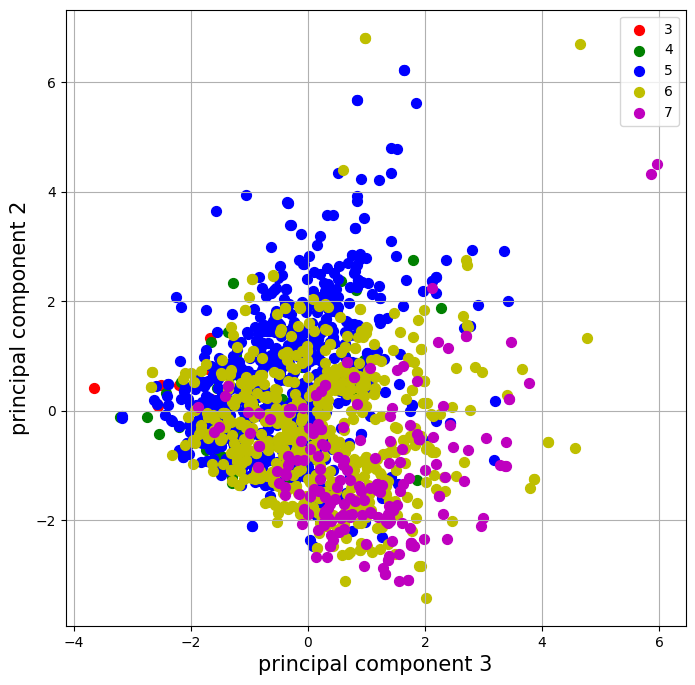

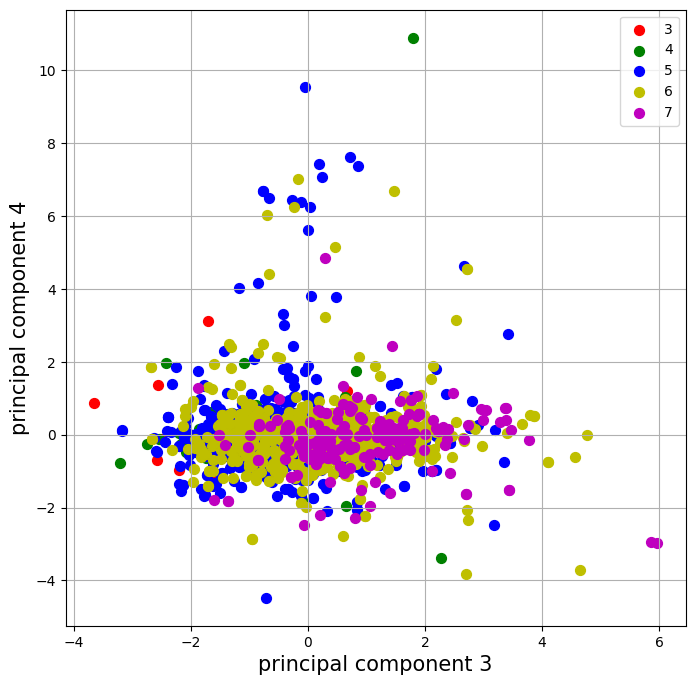

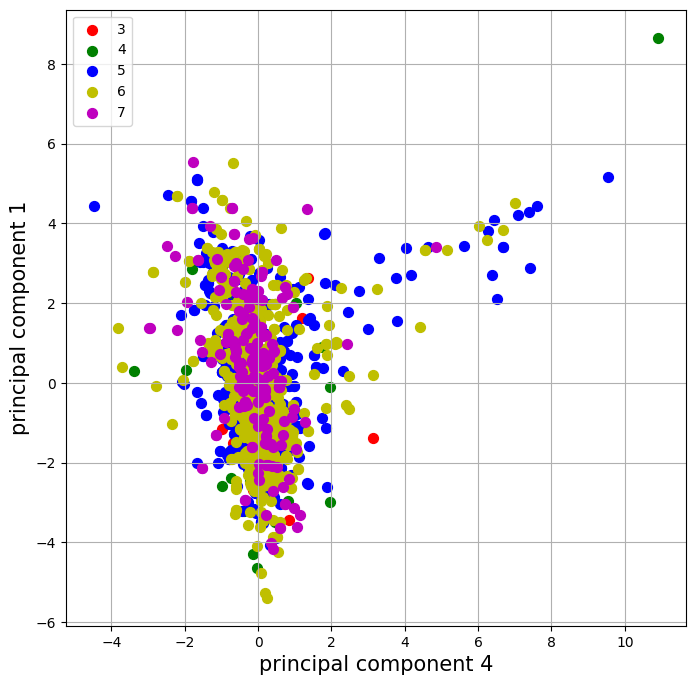

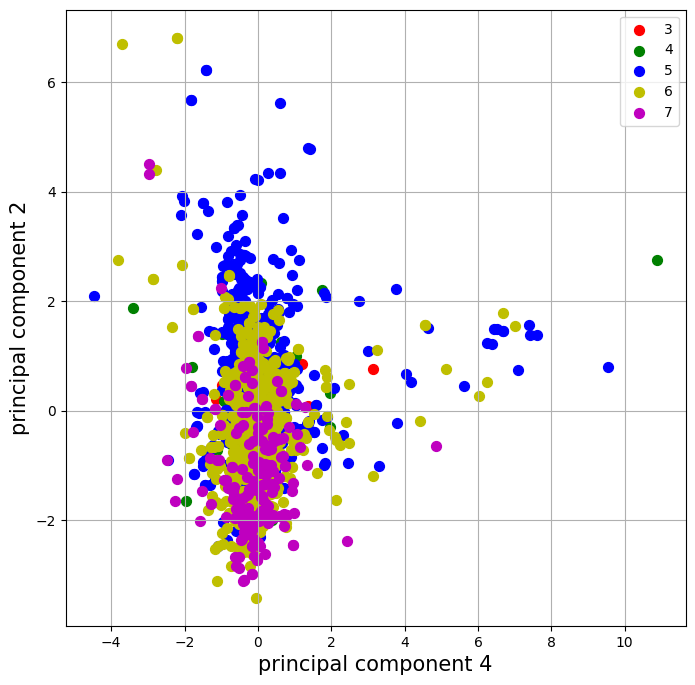

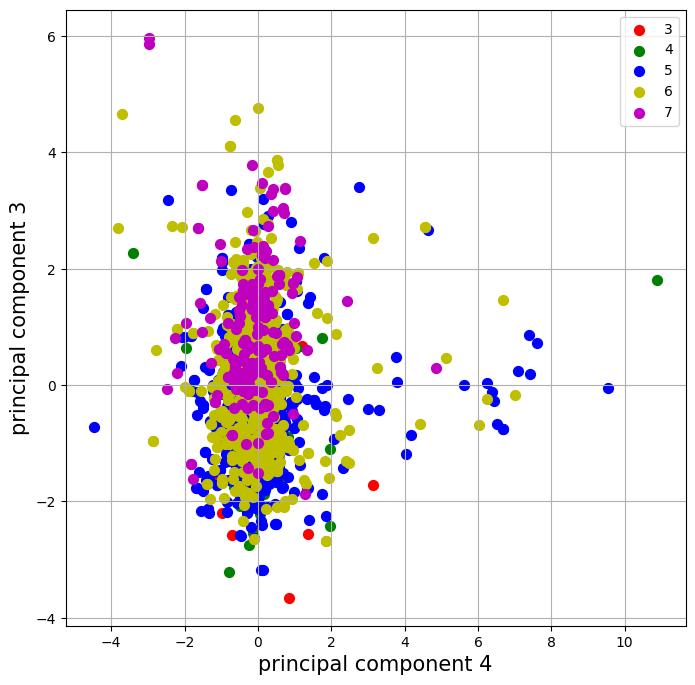

In [ ]:
import matplotlib.pyplot as plt

var = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4']

targets = [3, 4, 5, 6, 7, 8]
colors = ['r', 'g', 'b', 'y', 'm']
for i in var:
  for b in var:
    if i != b:
      fig = plt.figure(figsize = (8,8))
      ax = fig.add_subplot(1,1,1)
      ax.set_xlabel(i, fontsize = 15)
      ax.set_ylabel(b, fontsize = 15)
      #ax.set_title('2 component PCA', fontsize = 20)
      for target, color in zip(targets,colors):
          indicesToKeep = finalDf['quality'] == target
          ax.scatter(finalDf.loc[indicesToKeep, i]
                    , finalDf.loc[indicesToKeep, b]
                    , c = color
                    , s = 50)
      ax.legend(targets)
      ax.grid()
      plt.show()

##Testando o efeito em um modelo de classificação



###Quatro componentes

In [ ]:
from sklearn.model_selection import train_test_split
df_pca2 = finalDf2.copy()
df_pca2['quality'] = df_pca2['quality'].astype('category')
x_train, x_test, y_train, y_test = train_test_split(df_pca2.loc[:,df_pca2.columns!="quality"],
                                                      df_pca2.quality, test_size=0.4,
                                                      random_state=4)
print('Bancos:','\nX-Y treino:',len(x_train),'\nX-Y teste:',len(x_test))

Bancos: 
X-Y treino: 959 
X-Y teste: 640


**MÁQUINA DE VETOR SUPORTE - 4 COMPONENTES**

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report

clf = svm.SVC()
clf.fit(x_train, y_train)
predito = clf.predict(x_test)
print(classification_report(predito,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.77      0.58      0.66       352
           6       0.53      0.51      0.52       270
           7       0.16      0.72      0.26        18
           8       0.00      0.00      0.00         0

    accuracy                           0.56       640
   macro avg       0.24      0.30      0.24       640
weighted avg       0.65      0.56      0.59       640



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**RANDOM FOREST - 4 COMPONENTES**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(x_train, y_train)
predito = clf.predict(x_test)
print(classification_report(predito,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.05      0.25      0.08         4
           5       0.75      0.64      0.69       314
           6       0.61      0.60      0.60       267
           7       0.42      0.65      0.51        54
           8       0.14      1.00      0.25         1

    accuracy                           0.62       640
   macro avg       0.33      0.52      0.36       640
weighted avg       0.66      0.62      0.63       640



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Seis componentes

In [ ]:
from sklearn.model_selection import train_test_split
df_pca = finalDf.copy()
df_pca['quality'] = df_pca['quality'].astype('category')
x_train, x_test, y_train, y_test = train_test_split(df_pca.loc[:,df_pca.columns!="quality"],
                                                      df_pca.quality, test_size=0.4,
                                                      random_state=4)
print('Bancos:','\nX-Y treino:',len(x_train),'\nX-Y teste:',len(x_test))

Bancos: 
X-Y treino: 959 
X-Y teste: 640


**MÁQUINA DE VETOR SUPORTE - 6 COMPONENTES**

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report

clf = svm.SVC()
clf.fit(x_train, y_train)
predito = clf.predict(x_test)
print(classification_report(predito,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.77      0.63      0.69       327
           6       0.62      0.55      0.58       293
           7       0.19      0.80      0.31        20
           8       0.00      0.00      0.00         0

    accuracy                           0.60       640
   macro avg       0.26      0.33      0.26       640
weighted avg       0.68      0.60      0.63       640



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**RANDOM FOREST - 6 COMPONENTES**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(x_train, y_train)
predito = clf.predict(x_test)
print(classification_report(predito,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         4
           5       0.81      0.66      0.73       325
           6       0.63      0.64      0.64       259
           7       0.45      0.73      0.55        51
           8       0.14      1.00      0.25         1

    accuracy                           0.65       640
   macro avg       0.34      0.50      0.36       640
weighted avg       0.70      0.65      0.67       640



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#BOOTSTRAP - DATASET PEIXES

In [ ]:
import pandas as pd

df_fish = pd.read_csv("/content/dataset_peixe.csv")

In [ ]:
display(df_fish)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
#O efeito disso é um pior ajustamento do modelo:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_fish.loc[:,df_fish.columns!="Species"],
                                                      df_fish.Species, test_size=0.4,
                                                      random_state=4)
print('Bancos:','\nX-Y treino:',len(x_train),'\nX-Y teste:',len(x_test))


Bancos: 
X-Y treino: 95 
X-Y teste: 64


In [ ]:
import collections
print('Banco de treino:\n', collections.Counter(y_train))
print('\nBanco de teste:\n', collections.Counter(y_test))


Banco de treino:
 Counter({'Perch': 38, 'Roach': 13, 'Bream': 12, 'Smelt': 11, 'Pike': 10, 'Parkki': 6, 'Whitefish': 5})

Banco de teste:
 Counter({'Bream': 23, 'Perch': 18, 'Pike': 7, 'Roach': 7, 'Parkki': 5, 'Smelt': 3, 'Whitefish': 1})


In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report

clf = svm.SVC()
clf.fit(x_train, y_train)
predito = clf.predict(x_test)
print(classification_report(predito,y_test))

              precision    recall  f1-score   support

       Bream       0.00      0.00      0.00         0
      Parkki       0.00      0.00      0.00         0
       Perch       1.00      0.29      0.45        62
        Pike       0.29      1.00      0.44         2
       Roach       0.00      0.00      0.00         0
       Smelt       0.00      0.00      0.00         0
   Whitefish       0.00      0.00      0.00         0

    accuracy                           0.31        64
   macro avg       0.18      0.18      0.13        64
weighted avg       0.98      0.31      0.45        64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Vamos fazer um Boostrap Resampling para aumentar a amostra e tentar melhorar o modelo
df_fish = df_fish.sample(n=10000, replace=True)
df_fish.count()

Species    10000
Weight     10000
Length1    10000
Length2    10000
Length3    10000
Height     10000
Width      10000
dtype: int64

##Reamostrando dentro das categorias

In [ ]:
#Como temos um desequilíbrio do número de elementos nas categorias, isso gera um problema para o modelo
#Vamos equilibrar o número de observações em cada categoria usando o bootstrap

categorias = df_fish.Species.unique()
print('Categorias:',categorias)

flag = 0 #vamos usar para facilitar criar o dataframe
for peixe in categorias:
  df_aux = df_fish[df_fish['Species']==peixe]
  df_aux = df_aux.sample(n=10000, replace=True)
  if flag == 0: #primeira rodada
    df_fish3 = df_aux.copy()
    flag = 1
  else:
    df_fish3 = pd.concat([df_fish3,df_aux])

Categorias: ['Bream' 'Pike' 'Perch' 'Whitefish' 'Smelt' 'Parkki' 'Roach']


In [ ]:
df_fish3.groupby('Species')['Species'].count()

Species
Bream        10000
Parkki       10000
Perch        10000
Pike         10000
Roach        10000
Smelt        10000
Whitefish    10000
Name: Species, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_fish3.loc[:,df_fish3.columns!="Species"],
                                                      df_fish3.Species, test_size=0.4,
                                                      random_state=4)
print('Bancos:','\nX-Y treino:',len(x_train),'\nX-Y teste:',len(x_test))


Bancos: 
X-Y treino: 42000 
X-Y teste: 28000


In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report

clf = svm.SVC()
clf.fit(x_train, y_train)
predito = clf.predict(x_test)
print(classification_report(predito,y_test))

              precision    recall  f1-score   support

       Bream       0.89      0.57      0.70      6146
      Parkki       0.82      0.55      0.66      5989
       Perch       0.04      1.00      0.07       151
        Pike       1.00      1.00      1.00      4032
       Roach       0.34      0.57      0.42      2315
       Smelt       1.00      0.94      0.97      4253
   Whitefish       0.63      0.50      0.56      5114

    accuracy                           0.67     28000
   macro avg       0.67      0.73      0.63     28000
weighted avg       0.81      0.67      0.72     28000




**APLICANDO PCA + BOOTSTRAP**

In [ ]:
features = ["Weight",	"Length1",	"Length2",	"Length3",	"Height",	"Width"]
# Separando as features do dataframe
x = df_fish.loc[:, features].values
# Separando as saídas do dataframe
y = df_fish.loc[:,'Species'].values
# Normalizando as features -> z = (x-mean)/sd
x = StandardScaler().fit_transform(x)

df_fishPCA = pd.DataFrame(x,columns=features)
df_fishPCA.insert(len(features),'Species',y)
df_fishPCA.head()

,Weight,Length1,Length2,Length3,Height,Width,Species
0,0.691171,0.465542,0.464725,0.636500,1.296369,0.765304,Bream
1,-0.559733,0.365772,0.353040,0.301049,-0.799343,-0.627907,Pike
2,-0.879408,-0.851422,-0.828957,-0.903131,-0.900625,-0.828596,Perch
3,-0.365148,-0.222871,-0.186770,-0.172021,-0.192830,-0.110843,Whitefish
4,1.525107,1.163932,1.162755,1.307400,2.037556,1.146127,Bream


In [ ]:
pca3 = PCA(n_components=4)
principalComponents3 = pca3.fit_transform(x)
principalDf3 = pd.DataFrame(data = principalComponents3
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
df_fishPCA2 = pd.concat([principalDf3, df_fishPCA[['Species']]], axis = 1)
df_fishPCA2.head()

,principal component 1,principal component 2,principal component 3,principal component 4,Species
0,1.711622,-0.797881,-0.111436,0.037301,Bream
1,-0.332207,1.065791,-0.516040,-0.427719,Pike
2,-2.111834,0.175852,0.082530,-0.023035,Perch
3,-0.510585,0.003562,0.041951,-0.180139,Whitefish
4,3.346847,-0.885893,-0.384075,0.267333,Bream


In [ ]:
#Variância dos dados explicada por cada componente:
var_exp_fish = pca3.explained_variance_ratio_
print(var_exp_fish)
for i in range(np.shape(var_exp_fish)[0]):
  print(i+1,'ª componente: ', var_exp_fish[i])
print('Variação total explicada pelas componentes principais:',np.sum(var_exp_fish))

[0.87810278 0.085225   0.0201299  0.01623862]
1 ª componente:  0.8781027792952605
2 ª componente:  0.08522500387846547
3 ª componente:  0.02012990126806701
4 ª componente:  0.016238618282300245
Variação total explicada pelas componentes principais: 0.9996963027240932


In [ ]:
#Vamos fazer um Boostrap Resampling para aumentar a amostra e tentar melhorar o modelo
df_fishPCAfinish = df_fishPCA2.sample(n=10000, replace=True)
df_fishPCAfinish.count()

principal component 1    10000
principal component 2    10000
principal component 3    10000
principal component 4    10000
Species                  10000
dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_fishPCAfinish.loc[:,df_fishPCAfinish.columns!="Species"],
                                                      df_fishPCAfinish.Species, test_size=0.4,
                                                      random_state=4)
print('Bancos:','\nX-Y treino:',len(x_train),'\nX-Y teste:',len(x_test))

Bancos: 
X-Y treino: 6000 
X-Y teste: 4000


In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report

clf = svm.SVC()
clf.fit(x_train, y_train)
predito = clf.predict(x_test)
print(classification_report(predito,y_test))

              precision    recall  f1-score   support

       Bream       0.97      1.00      0.98       857
      Parkki       1.00      0.91      0.95       293
       Perch       0.95      0.88      0.91      1543
        Pike       1.00      1.00      1.00       437
       Roach       0.62      0.68      0.65       446
       Smelt       1.00      1.00      1.00       356
   Whitefish       0.48      1.00      0.65        68

    accuracy                           0.91      4000
   macro avg       0.86      0.92      0.88      4000
weighted avg       0.92      0.91      0.91      4000

